In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset
energy = pd.read_csv('energydata_complete.csv')
energy

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [3]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
# checking duplicate rows
energy.duplicated().sum()

0

In [5]:
# checking null values
energy.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
energy.describe(include='all')

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


<AxesSubplot:>

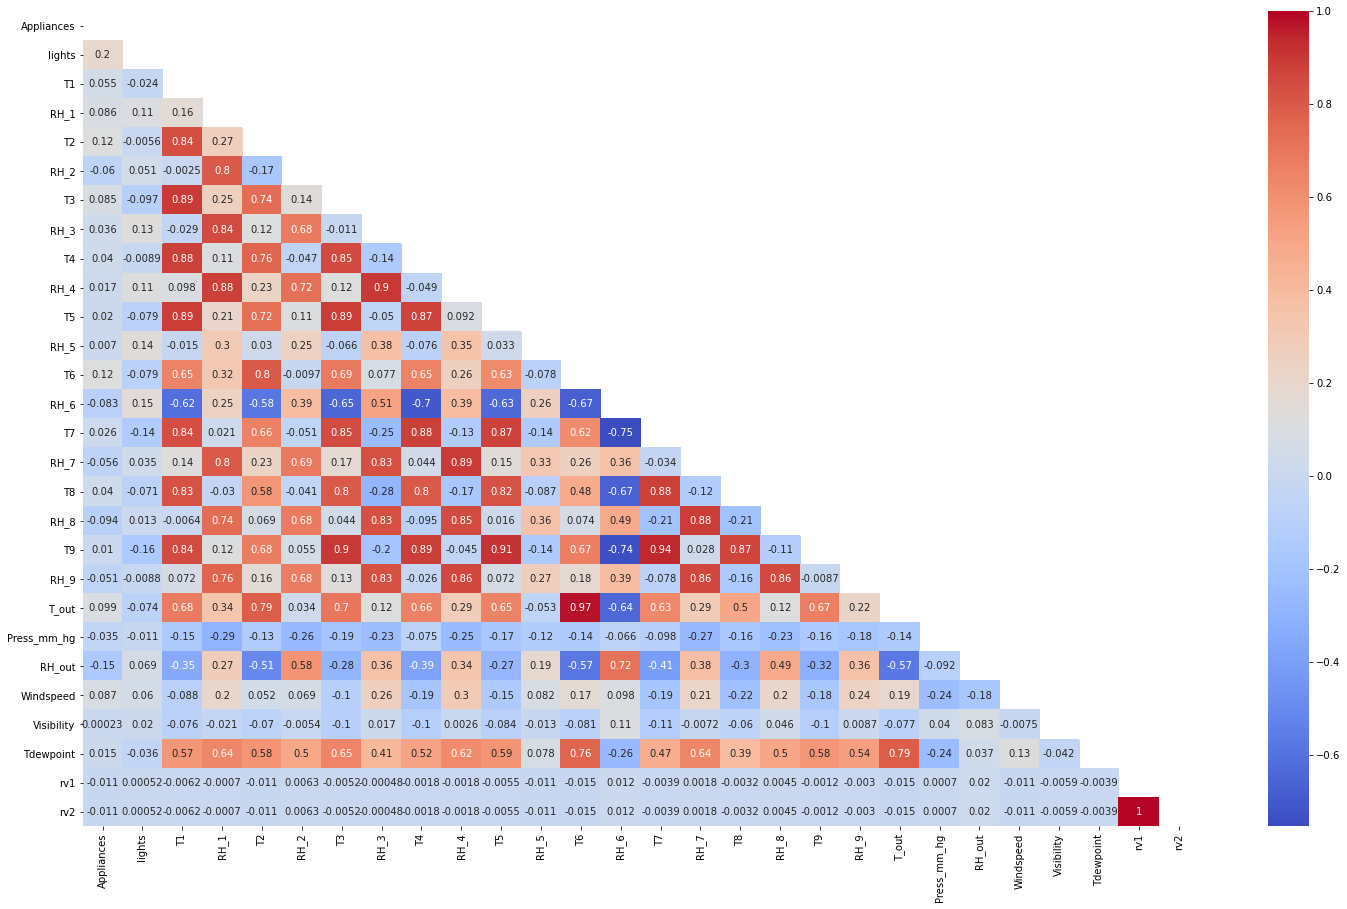

In [7]:
# heatmap of the dataset
plt.figure(figsize = (25,15))
mask = np.triu(energy.corr())
sns.heatmap(energy.corr(), annot = True, cmap = 'coolwarm', mask = mask)

In [8]:
# viewing column names
energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [9]:
# dropping the date and lights columns and assigning the new column to a new variable
new_energy= energy.drop(columns= ['date', 'lights'])
new_energy

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


### NORMALIZING THE DATASET USING MIN MAX SCALER

In [10]:
# normalising the dataset using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_energy = pd.DataFrame(scaler.fit_transform(new_energy), columns=new_energy.columns)
scaled_features= normalised_energy.drop(columns='Appliances')

### TRAIN TEST SPLIT

In [11]:
# spliting the dataset into the train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, normalised_energy['Appliances'], test_size=0.3,
                                                    random_state=42)


### LINEAR REGRESSION

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [13]:
# Question 12
# fit a linear model on the relationship between the temperature in the living room in Celsius (x= T2) and the temperature
# outside the building (y = T6). what is the R^2 value in 2 decimal places?
print('R-Squared: ', round(metrics.r2_score(y_test, pred), 2)* 2)

R-Squared:  0.3


In [14]:
# Question 13
# what is the Mean Absolute Error (in two decimal places)?
print('MAE: ', round(metrics.mean_absolute_error(y_test, pred), 2))

MAE:  0.05


In [15]:
# Question 14
# What is the Residual Sum of Squares (in two decimal places)?
print('Residual Sum of Squares (RSS): ', round(np.sum(np.square(y_test - pred)), 2))

Residual Sum of Squares (RSS):  45.35


In [16]:
# Question 15
# What is the Root Mean Squared Error (in three decimal places)?
print('Root Mean Squared Error (RMSE): ', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),3))

Root Mean Squared Error (RMSE):  0.088


In [17]:
# Question 16
# What is the Coefficient of Determination (in two decimal places)
print('R-Squared/ Coefficient of Determination: ', round(metrics.r2_score(y_test, pred), 2))

R-Squared/ Coefficient of Determination:  0.15


In [18]:
# Question 17
# Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df


linear_model_weights = get_weights_df(lr, x_train, 'Linear_Model_Weight')

print(linear_model_weights)
print('feature with the lowest weight: ', linear_model_weights['Features'][0], ', with a weight of: ', linear_model_weights['Linear_Model_Weight'][0])
print('feature with the highest weight: ', linear_model_weights['Features'][25], ', with a weight of: ', linear_model_weights['Linear_Model_Weight'][25])


       Features  Linear_Model_Weight
0          RH_2            -0.456698
1         T_out            -0.321860
2            T2            -0.236178
3            T9            -0.189941
4          RH_8            -0.157595
5        RH_out            -0.077671
6          RH_7            -0.044614
7          RH_9            -0.039800
8            T5            -0.015657
9            T1            -0.003281
10          rv1             0.000770
11          rv2             0.000770
12  Press_mm_hg             0.006839
13           T7             0.010319
14   Visibility             0.012307
15         RH_5             0.016006
16         RH_4             0.026386
17           T4             0.028981
18    Windspeed             0.029183
19         RH_6             0.038049
20         RH_3             0.096048
21           T8             0.101995
22    Tdewpoint             0.117758
23           T6             0.236425
24           T3             0.290627
25         RH_1             0.553547
f

### RIDGE REGRESSION

In [19]:
# Question 18
# Train a ridge regression model with an alpha value of 0.4. is there any change to the root mean squared error (RMSE) when
# evaluated on the test set?
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.4)
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
ridge_rmse = print('RMSE of ridge regression: ', round(np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)), 3))
linear_rmse = print('RMSE of linear regression: ', round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 3))

if ridge_rmse == linear_rmse:
    print('no change in RMSE evaluated on the test set')
else:
    print('change in RMSE evaluated on the test set')

RMSE of ridge regression:  0.088
RMSE of linear regression:  0.088
no change in RMSE evaluated on the test set


### Lasso Regression

In [20]:
# Question 19
# train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. how many of the 
# features have non-zero feature weights
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)

# checking features weights
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(lr, x_train, 'Linear_Model_Weight')
lasso_weights_df = get_weights_df(lasso, x_train, 'Lasso_weight')

new_weights = pd.merge(linear_model_weights, lasso_weights_df, on='Features')
print(new_weights)


# how many of the features have non-zero feature weights
lasso_count = new_weights['Lasso_weight']
counter = 0
for i in lasso_count:
    if i > 0: 
        counter += 1
    if i > -0:
        counter += 1
print(counter, 'features have non-zero weight')

       Features  Linear_Model_Weight  Lasso_weight
0          RH_2            -0.456698     -0.000000
1         T_out            -0.321860      0.000000
2            T2            -0.236178      0.000000
3            T9            -0.189941     -0.000000
4          RH_8            -0.157595     -0.000110
5        RH_out            -0.077671     -0.049557
6          RH_7            -0.044614     -0.000000
7          RH_9            -0.039800     -0.000000
8            T5            -0.015657     -0.000000
9            T1            -0.003281      0.000000
10          rv1             0.000770     -0.000000
11          rv2             0.000770     -0.000000
12  Press_mm_hg             0.006839     -0.000000
13           T7             0.010319     -0.000000
14   Visibility             0.012307      0.000000
15         RH_5             0.016006      0.000000
16         RH_4             0.026386      0.000000
17           T4             0.028981     -0.000000
18    Windspeed             0.0

In [21]:
# Question 20
# what is the new RMSE with the Lasso Regression (in 3 decimal places)?
print('RMSE of Lasso Regression: ', round(np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)), 3))

RMSE of Lasso Regression:  0.094
